# Tutorial 6 
# Artificial Neural Networks

# Creating Neural Networks in Keras

Let's take a look at how we can use Keras to build the two-layer neural network that we introduced earlier. To build a linear collection of layers, first declare a Sequential model in Keras:

In [1]:
#!pip install tensorflow==2.3.0
#!pip install keras==2.4

In [1]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Fixing a random seed ensures reproducible results
import numpy as np
from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(9)

In [2]:
from keras.models import Sequential
# from keras import models
model = Sequential()

Using TensorFlow backend.


This creates an empty  Sequential model that we can now add layers to. Adding layers in Keras is simple and similar to stacking Lego blocks on top of one another. We start by adding layers from the left (the layer closest to the input):

In [3]:
from keras.layers import Dense

# Layer 1
model.add(Dense(units = 4, activation = 'sigmoid', input_dim = 3))

# Output Layer
model.add(Dense(units = 1, activation = 'sigmoid'))

Stacking layers in Keras is as simple as calling the model.add() command. Notice that we had to define the number of units in each layer. Generally, increasing the number of units increases the complexity of the model, as it means that there are more weights to be trained. For the first layer, we had to define input_dim. This informs Keras the number of features (that is, columns) in the dataset. Also, note that we have used a Dense layer. A Dense layer is simply a fully connected layer. Later, we will introduce other kinds of layers, specific to different types of problems.
* We can verify the structure of our model by calling the model.summary() function:

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# Once we are satisfied with our model's architecture, let's compile it and start the training process
from keras import optimizers

# Declare and initialise an object by calling a method SGD - Stochatic Gradient Decendent
sgd = optimizers.SGD(lr = 1, momentum = 0.9)

# Compile the model
model.compile(loss = 'mean_squared_error', optimizer = sgd)

Let's define an X and Y NumPy array, corresponding to the features and the target variables respectively.

In [7]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])
y = np.array([[0],[1],[1],[0]])

In [10]:
# Finally, let's train the model for 1500 iterations:
model.fit(X, y, epochs = 1500, verbose = False)

In [11]:
# To get the predictions, run the model.predict() command on our data:
print(model.predict(X))
# The outpue will be different because of different random numbers

[[0.01028934]
 [0.9890311 ]
 [0.98912704]
 [0.01205841]]


Comparing this to the predictions that we obtained earlier, we can see that the results are extremely similar. The major advantage of using Keras is that we did not have to worry about the low-level implementation details and mathematics while building our neural network, unlike what we did earlier. In fact, we did no math at all. All we did in Keras was to call a series of APIs to build our neural network. This allows us to focus on high-level details, enabling rapid experimentation.

####     NN Model values:[[0.01028934]  [0.9890311 ]  [0.98912704 ]  [0.01205841]]
####     Original values:         0                         1                     1                   0

# Diabetes – understanding the problem

In [12]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [13]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


<Figure size 576x576 with 0 Axes>

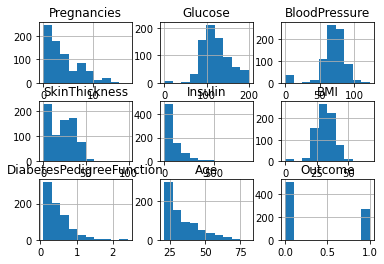

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize = (8, 8))
df.hist()
plt.show()

The following code snippet shows how to plot a density plot for each variable. To visualize the difference in distribution between diabetics and non-diabetics, we will also plot them separately on each plot:

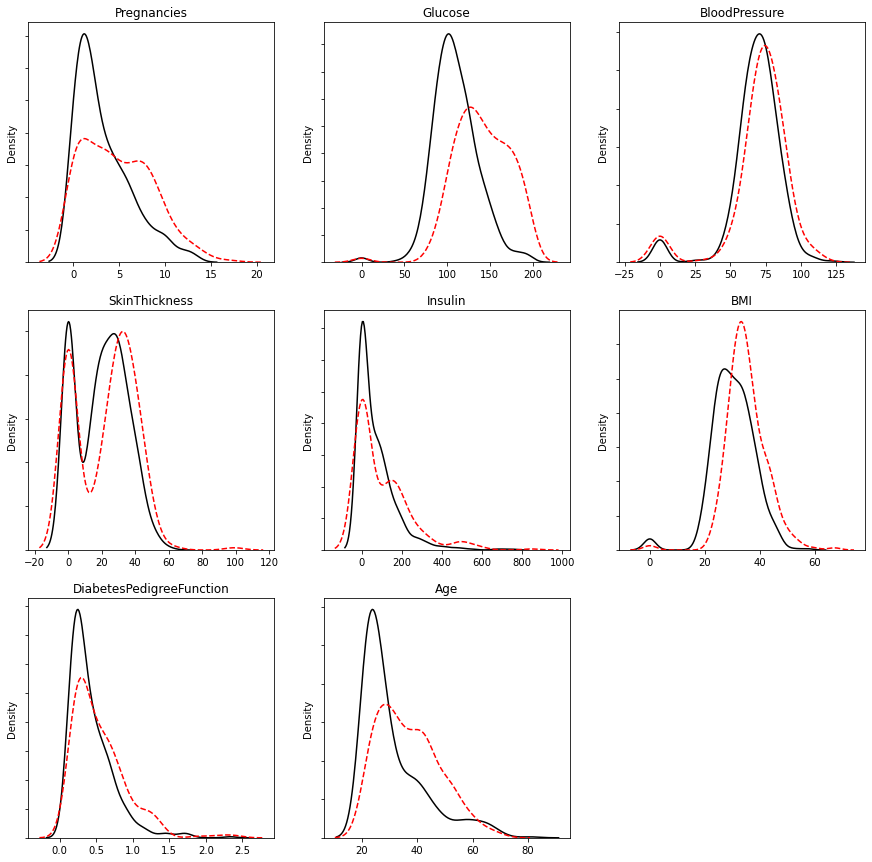

In [15]:
import seaborn as sns# create a subplot of 3 x 3
plt.subplots(3, 3, figsize = (15, 15))
# Plot a density plot for each variable
for idx, col in enumerate(df.columns):    
    ax = plt.subplot(3, 3, idx + 1)    
    ax.yaxis.set_ticklabels([])    
    sns.distplot(df.loc[df.Outcome == 0][col], hist = False, axlabel = False,     
    kde_kws = {'linestyle':'-',      
    'color':'black', 'label':"No Diabetes"})    
    sns.distplot(df.loc[df.Outcome == 1][col], hist = False, axlabel = False,     
    kde_kws = {'linestyle':'--',
    'color':'red', 'label':"Diabetes"})
    ax.set_title(col)
# Hide the 9th subplot (bottom right) since there are only 8 plots
plt.subplot(3,3,9).set_visible(False)

plt.show()

# Handling missing values
#### First, let's call the isnull() function to check whether there are any missing values in the dataset:

In [16]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [15]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

We can see that there are 768 rows of data, and the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns have a minimum value of 0. This doesn't quite make sense. The measurements for Glucose, BloodPressure, SkinThickness, Insulin, and BMI should never be 0. This is an indication that there are missing values in our dataset. The values were probably recorded as 0 due to certain issues during data collection. Perhaps the equipment was faulty, or the patient was unwilling to have their measurements taken.
* In any case, we need to handle these 0 values. Let's take a look at how many 0 values are there in each column to understand the extent of the problem:

In [17]:
print("Number of rows with 0 values for each variable")
for col in df.columns:    
    missing_rows = df.loc[df[col] == 0].shape[0]    
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


#### In the Insulin column, there are 374 rows with 0 values. That is almost half of the data that we have! Clearly, we cannot discard these rows with 0 values as that will cause a significant drop in model performance.
#### There are several techniques to handle these missing values:
#### Remove (discard) any rows with missing values.
#### Replace the missing values with the mean/median/mode of the non-missing values.
#### Predict the actual values using a separate machine learning model.

### First, let's replace the 0 values in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns with NaN. This way, pandas will understand that these values are invalid:

In [18]:
import numpy as np
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

#### Now let's confirm that the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns no longer contain 0 values:

In [19]:
print("Number of rows with 0 values for each variable")
for col in df.columns:    
    missing_rows = df.loc[df[col]==0].shape[0]    
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


* Note that we did not modify the Pregnancies column as 0 values in that column (that is, 0 previous pregnancies) are perfectly valid.
* Now, let's replace the NaN values with the mean of the non-missing values. We can do this using the handy fillna() function in pandas:

In [29]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [30]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-3.351824e-02,6.655021e-01,-3.345079e-16,1.662917e-01,0.468492,1.425995,1
1,-0.844885,-1.206162,-5.298590e-01,-1.746338e-02,-3.345079e-16,-8.525312e-01,-0.365061,-0.190672,0
2,1.233880,2.015813,-6.953060e-01,8.087936e-16,-3.345079e-16,-1.332833e+00,0.604397,-0.105584,1
3,-0.844885,-1.074652,-5.298590e-01,-7.004289e-01,-7.243887e-01,-6.342120e-01,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669e+00,6.655021e-01,1.465506e-01,1.548980e+00,5.484909,-0.020496,1
5,0.342981,-0.186965,1.319287e-01,8.087936e-16,-3.345079e-16,-9.980773e-01,-0.818079,-0.275760,0
6,-0.250952,-1.436303,-1.853434e+00,3.240194e-01,-7.950054e-01,-2.121282e-01,-0.676133,-0.616111,1
7,1.827813,-0.219843,1.175571e-15,8.087936e-16,-3.345079e-16,4.137202e-01,-1.020427,-0.360847,0
8,-0.547919,2.476096,-1.989652e-01,1.803778e+00,4.560094e+00,-2.849013e-01,-0.947944,1.681259,1
9,1.233880,0.108930,1.951845e+00,8.087936e-16,-3.345079e-16,-3.102502e-15,-0.724455,1.766346,1


In [31]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


## Data standardization
Data standardization is another important technique in data preprocessing. The goal of data standardization is to transform the numeric variables so that each variable has zero mean and unit variance.

In [32]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

#### Since the object returned by the preprocessing.scale() function is no longer a pandas DataFrame, let's convert it back:

In [33]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [34]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [41]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


## Splitting the data into training, testing, and validation sets                                                        
The last step in data preprocessing is to split the data into training, testing, and validation sets:
* Training set: The neural network will be trained on this subset of the data.
* Validation set: This set of data allows us to perform hyperparameter tuning (that is, tuning the number of hidden layers) using an unbiased source of data.
* Testing set: The final evaluation of the neural network will be based on this subset of the data.

### First, let's separate the dataset into X (input features) and y (target variable):

In [42]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

#### Then, make the first split to split the data into the training set (80%) and the testing set (20%) according to the preceding diagram:

In [43]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Model building

In [44]:
from keras.models import Sequential
model = Sequential()

In [45]:
# Let's add the first hidden layer:
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 8))

In [46]:
# Let's add our second hidden layer:
# Add the second hidden layer
model.add(Dense(16, activation = 'relu'))

In [47]:
# Now we add the output layer as follows:
# Add the output layer
model.add(Dense(1, activation = 'sigmoid'))

# Model compilation

In [48]:
# Then, we can run the compile() function as follows:
    # Compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Model training

In [50]:
# To train our MLP model defined in earlier steps, let's call the fit function. Let's train our model for 200 iterations:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs = 400)

Epoch 1/400
20/20 [==============================] - 0s 1ms/step - loss: 0.2579 - accuracy: 0.8925
Epoch 2/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.9023
Epoch 3/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8990
Epoch 4/400
20/20 [==============================] - 0s 3ms/step - loss: 0.2551 - accuracy: 0.8990
Epoch 5/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9023
Epoch 6/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.9007
Epoch 7/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9007
Epoch 8/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.9007
Epoch 9/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.9039
Epoch 10/400
20/20 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9039
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9300
Epoch 83/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9316
Epoch 84/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9349
Epoch 85/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1916 - accuracy: 0.9349
Epoch 86/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9251
Epoch 87/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9365
Epoch 88/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9381
Epoch 89/400
20/20 [==============================] - 0s 997us/step - loss: 0.1907 - accuracy: 0.9332
Epoch 90/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9365
Epoch 91/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9332
Epoch 92/40

20/20 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9658
Epoch 163/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1444 - accuracy: 0.9642
Epoch 164/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1429 - accuracy: 0.9609
Epoch 165/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1427 - accuracy: 0.9609
Epoch 166/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9609
Epoch 167/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9642
Epoch 168/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9609
Epoch 169/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9658
Epoch 170/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9642
Epoch 171/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1383 - accuracy: 0.9674
Epoc

20/20 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9723
Epoch 244/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1060 - accuracy: 0.9723
Epoch 245/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9723
Epoch 246/400
20/20 [==============================] - ETA: 0s - loss: 0.1288 - accuracy: 0.96 - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9658
Epoch 247/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9723
Epoch 248/400
20/20 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9756
Epoch 249/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9723
Epoch 250/400
20/20 [==============================] - 0s 2ms/step - loss: 0.1050 - accuracy: 0.9772
Epoch 251/400
20/20 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9805
Epoch 252/400
20/20 [==============================] - 0s 2ms/s

20/20 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9886
Epoch 324/400
20/20 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9902
Epoch 325/400
20/20 [==============================] - 0s 1ms/step - loss: 0.0712 - accuracy: 0.9870
Epoch 326/400
20/20 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9902
Epoch 327/400
20/20 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9902
Epoch 328/400
20/20 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 1.00 - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9886
Epoch 329/400
20/20 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9902
Epoch 330/400
20/20 [==============================] - 0s 4ms/step - loss: 0.0690 - accuracy: 0.9902
Epoch 331/400
20/20 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9870
Epoch 332/400
20/20 [==============================] - 0s 3ms/s

# Results analysis
#### Having successfully trained our MLP, let's evaluate our model based on the testing accuracy, confusion matrix, and receiver operating characteristic (ROC) curve.

# Testing accuracy
#### We can evaluate our model on the training set and testing set using the evaluate() function:

In [51]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 947us/step - loss: 0.0459 - accuracy: 0.9984
Training Accuracy: 99.84%

5/5 [==============================] - 0s 798us/step - loss: 1.1966 - accuracy: 0.7597
Testing Accuracy: 75.97%



The accuracy is 90.07% and 78.57% on the training set and testing set respectively. The difference in accuracy between the training and testing set isn't surprising since the model was trained on the training set.

# Confusion matrix
The confusion matrix is a useful visualization tool that provides analysis on the true negative, false positive, false negative, and true positives made by our model. Beyond a simple accuracy metric, we should also look at the confusion matrix to understand the performance of the model.The definition of true negative, false positive, false negative, and true positives are as follows:

- True negative: Actual class is negative (no diabetes), and the model predicted negative (no diabetes)
- False positive: Actual class is negative (no diabetes), but the model predicted positive (diabetes)
- False negative: Actual class is positive (diabetes), but the model predicted negative (no diabetes)
- True positive: Actual class is positive (diabetes), and the model predicted positive (diabetes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Text(33.0, 0.5, 'Actual')

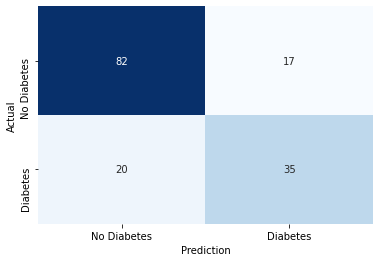

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,                  
                 xticklabels=['No Diabetes','Diabetes'],                
                 yticklabels=['No Diabetes','Diabetes'],                  
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

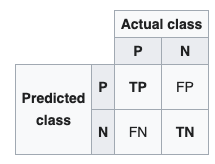

In [53]:
from IPython.display import Image
Image(filename='Image.png') 

Example of confusion matrix usage to evaluate the quality of the output of a classifier on the diabetes data set. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

## ROC curve
A receiver operating characteristic curve (ROC) is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

For classification tasks, we should also look at the ROC curve to evaluate our model. The ROC curve is a plot with the True Positive Rate (TPR) on the y axis and the False Positive Rate (FPR) on the x axis. 

In [54]:
# Let's plot the ROC curve for our model and analyze its performance. 
# As always, scikit-learn provides a useful roc_curve class to help us do this. 
# But first, let's get the predicted probabilities of each class using the predict() function:

In [55]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(X_test)

In [56]:
#Then, run the roc_curve function in order to get the corresponding false positive rate and true positive rate for the ROC curve:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

In [57]:
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

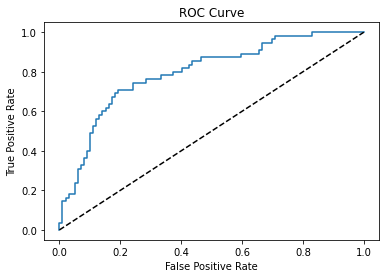

In [58]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#### From the preceding ROC Curve, we can see that the model performs rather well, close to the model ROC Curve shown in the preceding diagram. This shows that our model is able to differentiate samples of different classes, making good predictions.

# ANN Regression

In [59]:
# Load the libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

The dataset describes 13 numerical properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. Input attributes include things like crime rate, proportion of nonretail business acres, chemical concentrations and more.

This is a well-studied problem in machine learning. It is convenient to work with because all of the input and output attributes are numerical and there are 506 instances to work with.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.

In [60]:
# load dataset
dataframe = pd.read_csv("housing.csv", delim_whitespace = True, header = None)
df = dataframe.values

# split into input (X) and output (Y) variables
X = df[:,0:13]
y = df[:,13]

In [61]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    # Compile model
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [62]:
# define wider model
def wider_model():
    # create model
    # `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
    model = Sequential()
    # Adds a layer instance on top of the layer stack. # Create a `Sequential` model and add a Dense layer as the first layer.
    model.add(Dense(20, input_dim = 13, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer = 'normal'))
    
    # Compile model
    # The efficient ADAM optimization algorithm is used and a mean squared error loss function is optimized. 
    # This will be the same metric that we will use to evaluate the performance of the model.
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [63]:
# Evaluate Model
# Kfold Cross Validation
estimator = KerasRegressor(build_fn = baseline_model, epochs = 100, batch_size = 5, verbose = 0)
kfold = KFold(n_splits = 10)
results = cross_val_score(estimator, X, y, cv = kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -35.64 (26.91) MSE


In [64]:
# Evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn = wider_model, epochs = 100, 
                                         batch_size = 5, verbose = 0)))
# The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10)
results = cross_val_score(pipeline, X, y, cv = kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -23.57 (26.82) MSE


# Task
Apply ANN to Predict Average Daily Rates for Hotels. Data set (H1) is available on Moodle. Use the following features (independent) for ANN and target feature customer (ADR) from the given dataset.

#### Independent Features
* IsCanceled
* Country
* MarketSegment
* DepositType
* CustomerType
* RequiredCarParkingSpaces
* ArrivalDateWeekNumber

## Reference: 
* Neural Network Projects with Python by James Loy Published by Packt Publishing, 2019
* <p>machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python</p>